# K-Means Clustering
---
In this notebook we will take a look at another clustering algorithm known as K-Means Clustering. In clustering, the aim is to divide our unstructured data into different groups based on patterns in the data. Generally, there is no target class or a target variable that is to be predicted. We simply look at the data and then try to club together data points based upon similarity within the observations observations, thus forming different groups. Hence it is an unsupervised learning problem. 

So now that we have some idea about what the algorithm is let's take a real-world problem and try and apply this algorithm.


## Importing Project Dependencies
---
Let's begin by importing the necessary PyData modules.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

## Importing the Data
---

Let's say you are the data analyst for a mall. You have the data of the customers that visited the mall and you have to give this data to the marketting team after analysis in order to have better business. Before starting let's understand the columns in our data:-

* CustomerID - Contains the unique ID given to each customer
* Gender - Gender of the customer
* Age - Age of the Customer
* Annual Income - Annual income of the customer
* Spending score - Score assigned by the mall based on customer behavior and spending nature.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/OneStep-elecTRON/ContentSection/main/Datasets/mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info() #checking the types and columns of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There are 200 values in our dataset. Now, let us check if there are any null values. 

In [4]:
df.isnull().sum() #checking for the null values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

As we can see, there are no null values within our dataset. Let's us create the feature set then. For training, we will be using the __Annual Income__ and __Spending Score__ data for features.

In [5]:
# creating a two dimentional matrix using Annual Income and Spending Score
x = df.iloc[:,[3,4]].values

## Modeling
---
Now that we have the data ready, we will work on creating and training our K-Means clustering model. Let's see step by step how it is done. The following is the syntax of how you define a k-means model using scikit learn.

> **Kmeans(n_clusters,init,max_iter,n_init,random_state):-**
* n_clusters = The number of clusters to form as well as the number of centroids to generate.
* init = Method for initialization.
* max_iter = Maximum number of iterations of the k-means algorithm for a single run.
* n_init = Number of time the k-means algorithm will be run with different centroid seeds.
* random_state  = Determines random number generation for centroid initialization.

In [6]:
# Step 1- Importing k-means model class from sklearn
from sklearn.cluster import KMeans

# Step 2- Creating model object (For now, we will go with default hyperparameter values)
model = KMeans()

# Step 3- Training the model and generating predictions
y_cluster = model.fit_predict(x)

We have successfully trained our model and generated the clustering predictions on our data. Now let us evaluate the initial performance of our model. Mind you, this model we just trained was trained using default hyperparameter values. So we will have to optimize it at a later stage.
The evaluation metric we will be using here is WCSS (Within-Cluster-Sum-of-Squares).

Let us understand what the term WCSS actually means. 

> **WCSS:-** It is sum of squares of the distances of each data point in all clusters to their respective centroids. The idea is to minimize the sum. Suppose there are 'n' observation in a given dataset and we specify 'n' number of clusters (i.e., k = n) then WCSS will become zero since data points themselves will act as centroids and the distance will be zero and ideally this forms a perfect cluster, however this doesn’t make any sense as we have as many clusters as the observations. Thus, there exists a threshold value for K that we can find using the __*elbow point graph*__.

Sklearn allows us to check the WCSS of a model using the __model.inertia___ method.

In [7]:
model.inertia_

25022.485004530332

As we can see, we got an initial WCSS of around 7.5e+4. In the next section, we will learn how to get an optimal k-value so as to minimize WCSS.

## Finding the Optimal Number of Clusters
---
The very first step in K-Means clustering is to define to find the optimum number of clusters, or groups to divide our data into. There are a few methods to do this and in this notebook, we will be using the __Elbow Method__.

> **Elbow Method:-** We initialize the K-Means algorithm for a range of K values and will plot it against the WCSS for each K value.

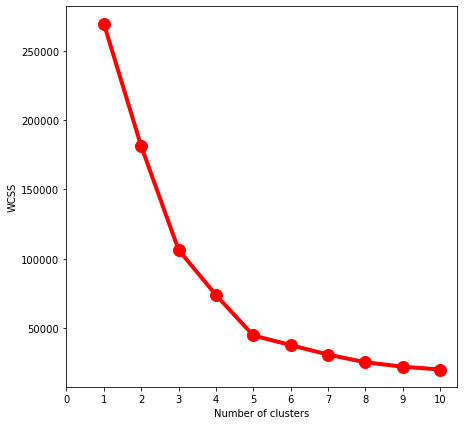

In [8]:
# find the optimal number of clusters using elbow method
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

With the increase in number of clusters, the value of WCSS also decreases. We select the value of K on basis of the rate of decrease in WCSS. In the above graph, we see that up until k = 5, the value of WCSS decreases rapidly (slope is steep). But after k = 5, the rate of decrease of WCSS w.r.t. the k-value becomes comparatively smaller, and hence we chose 5 as the optimal value. Let's use this to make our model.

In [9]:
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

Let's see the amount of data points clustered into each group.

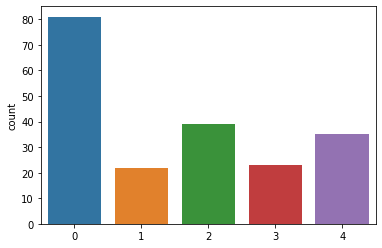

In [10]:
sns.countplot(y_clusters)

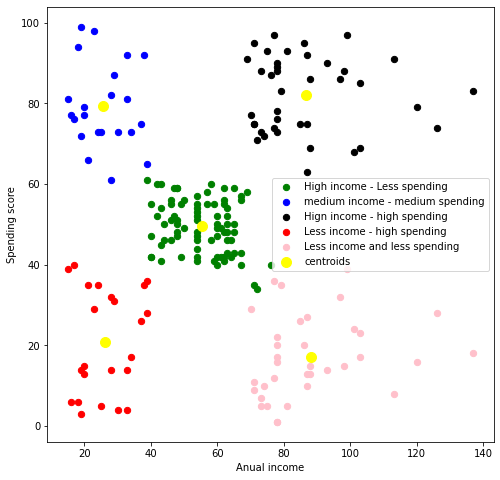

In [11]:
plt.figure(figsize = (8,8))
plt.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],s = 40, c = 'green', label = "High income - Less spending")
plt.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],s = 40, c = 'blue', label = "medium income - medium spending")
plt.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],s = 40, c = 'black', label = "Hign income - high spending")
plt.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],s = 40, c = 'red', label = "Less income - high spending")
plt.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],s = 40, c = 'pink', label = "Less income and less spending")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")
plt.xlabel("Anual income")
plt.ylabel("Spending score")
plt.legend()
plt.show()

Now that we have this 2D plot, let's see if we can convert this into a 3D plot by adding another feature. We will also include Age now and repeat the same process that we did for the first plot.

In [12]:
# creating the feature set
x = df[['Age','Annual Income (k$)','Spending Score (1-100)']].values

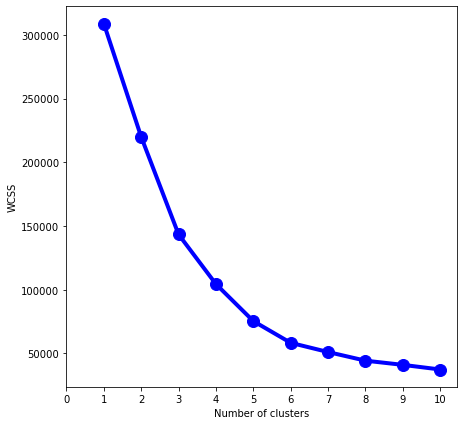

In [13]:
# getting best k-value via elbow method
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'blue')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

From the above graph, we find that 6 is the optimum number of clusters. Now we will train our final model with k-value as 6.

In [14]:
# creating and training a model with k-value 6
model = KMeans(n_clusters = 6, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters1 = model.fit_predict(x)

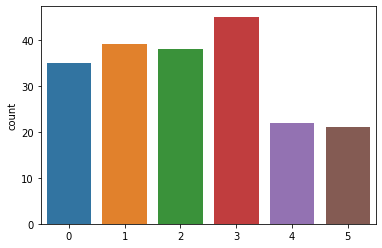

In [15]:
sns.countplot(y_clusters1)

Finally, let us plot our results on a 3D plot.

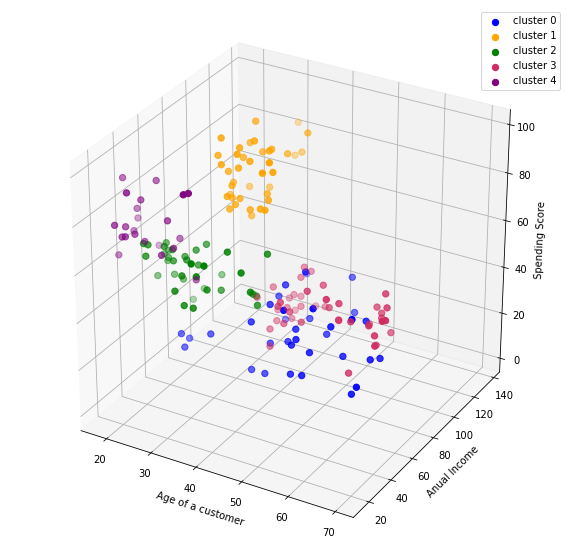

In [16]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters1 == 0,0],x[y_clusters1 == 0,1],x[y_clusters1 == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters1 == 1,0],x[y_clusters1 == 1,1],x[y_clusters1 == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters1 == 2,0],x[y_clusters1 == 2,1],x[y_clusters1 == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters1 == 3,0],x[y_clusters1 == 3,1],x[y_clusters1 == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(x[y_clusters1 == 4,0],x[y_clusters1 == 4,1],x[y_clusters1 == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.set_xlabel('Age of a customer')
ax.set_ylabel('Anual Income')
ax.set_zlabel('Spending Score')
ax.legend()
plt.show()

And with this, we come to an end to our notebook. You just performed your first unsupervised machine learning task today! Congratulations! Now go through the notebook again to make sure you actually understand all the concepts properly.